<a href="https://colab.research.google.com/github/aayushbokde/GenAI_Class_Assignments/blob/main/Assignment_6/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6

##  Create a text-to-image generation pipeline using a pre-trained model like DALL-E.

In [ ]:
# Install all required libraries for text-to-image generation
# diffusers      → Stable Diffusion pipelines
# transformers   → Text encoder used by diffusion models
# gradio         → (Optional) Used for building web interfaces
# accelerate     → Improves performance and GPU handling
!pip install diffusers transformers gradio accelerate

In [4]:
# Import Stable Diffusion pipeline from diffusers library
from diffusers import StableDiffusionPipeline

# Import matplotlib to display the generated image
import matplotlib.pyplot as plt

# Import PyTorch (used as backend for deep learning and GPU support)
import torch


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


In [5]:
!pip show torch #just to check the torch version

Name: torch
Version: 2.9.0+cu126
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org
Author: 
Author-email: PyTorch Team <packages@pytorch.org>
License: BSD-3-Clause
Location: /usr/local/lib/python3.12/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-cufile-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvshmem-cu12, nvidia-nvtx-cu12, setuptools, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchdata, torchvision


In [6]:
# Define the Hugging Face model repository IDs

# Dreamlike Diffusion: Fine-tuned Stable Diffusion model
# Best suited for artistic and cartoon-style images
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"

# Stable Diffusion XL (SDXL): Higher quality but heavier model
# (Not used in this code)
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"


In [7]:



# Load the Stable Diffusion pipeline using the Dreamlike model
pipe = StableDiffusionPipeline.from_pretrained(
    model_id1,                 # Model repository ID
    torch_dtype=torch.float16, # Use half precision for faster GPU computation
    use_safetensors=True       # Load safer and faster model weights
)


# Move the model to GPU (CUDA) for faster image generation
# If CUDA is not available, this line will cause an error
pipe = pipe.to("cuda")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--dreamlike-art--dreamlike-diffusion-1.0/snapshots/9fb5a6463bf79d81152e715e8d2a8b988f96c790/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [8]:
prompt = """A look out of house's large window to beautiful blue sea with a nice view of yacht """

In [9]:

# Generate the image using the Stable Diffusion pipeline
# The model converts text → embeddings → latent image → final image
# The output contains a list of images, so we take the first one
image = pipe(prompt).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

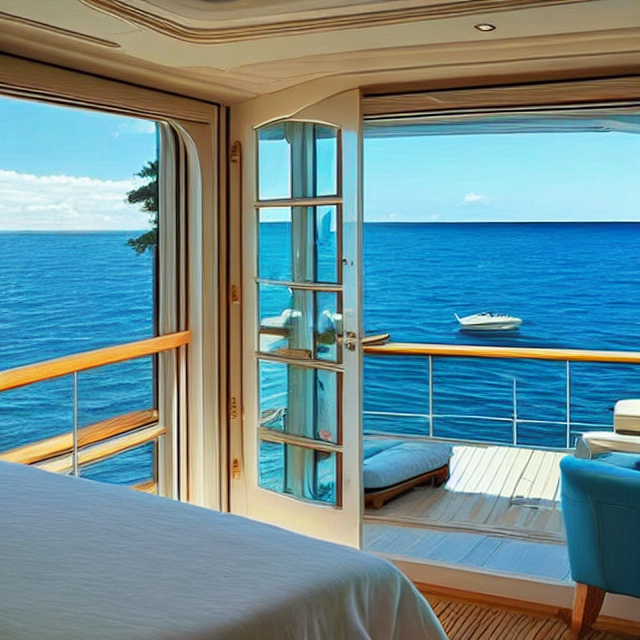

In [10]:
image

 [PROMPT]:  A look out of house's large window to beautiful blue sea with a nice view of yacht 


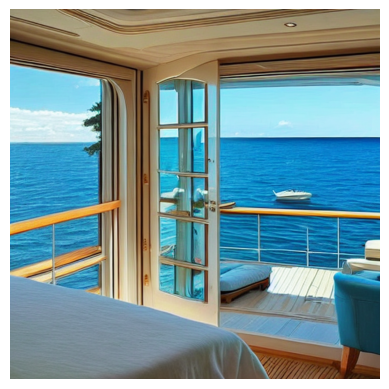

In [11]:
print(" [PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');